Scirpy Tutorial from https://icbi-lab.github.io/scirpy/latest/tutorials/tutorial_3k_tcr.html 

0. Setup

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


1. Preparing the data

The dataset ships with the scirpy package. We can conveniently load it from the scirpy.datasets module.

In [3]:
#adata = ir.datasets.wu2020() # 10K 
adata = ir.datasets.wu2020_3k() # 3k
adata.shape

(3000, 30727)

In [4]:
adata.obs

cluster_orig patient sample source  \
LN1_GTAGGCCAGCGTAGTG-1-19      4.4-FOS   Lung1    LN1    NAT   
RN2_AGAGCGACAGATTGCT-1-27      4.4-FOS  Renal2    RN2    NAT   
LN1_GTCATTTCAATGAAAC-1-19      8.2-Tem   Lung1    LN1    NAT   
LN2_GACACGCAGGTAGCTG-2-2     8.6-KLRB1   Lung2    LN2    NAT   
LN2_GCACTCTCAGGGATTG-2-2       4.4-FOS   Lung2    LN2    NAT   
...                                ...     ...    ...    ...   
RT3_GCAGTTAGTATGAAAC-1-6     4.2-RPL32  Renal3    RT3  Tumor   
LT1_GACGTGCTCTCAAGTG-1-24      8.2-Tem   Lung1    LT1  Tumor   
ET3_GCTGGGTAGACCTTTG-1-3        3.1-MT   Endo3    ET3  Tumor   
RT1_TAAGAGATCCTTAATC-1-8     4.5-IL6ST  Renal1    RT1  Tumor   
LN2_TCTGAGAAGGACACCA-2-2     4.6b-Treg   Lung2    LN2    NAT   

                             clonotype_orig multi_chain IR_VJ_1_locus  \
LN1_GTAGGCCAGCGTAGTG-1-19     lung1.tn.C223       False           nan   
RN2_AGAGCGACAGATTGCT-1-27  renal2.tnb.C1362       False           TRA   
LN1_GTCATTTCAATGAAAC-1-19      lung1.tn.C25       False           TRA   
LN2_GACACGCAGGTAGCTG-2-2     lung2.tn.C2452       False           nan   
LN2_GCACTCTCAGGGATTG-2-2     lung2.tn.C5631       False           TRA   
...                                     ...         ...           ...   
RT3_GCAGTTAGTATGAAAC-1-6    renal3.tnb.C176       False           TRA   
LT1_GACGTGCTCTCAAGTG-1-24     lung1.tn.C151       False           TRA   
ET3_GCTGGGTAGACCTTTG-1-3       endo3.tn.C76       False           nan   
RT1_TAAGAGATCCTTAATC-1-8     renal1.tnb.C83       False           TRA   
LN2_TCTGAGAAGGACACCA-2-2     lung2.tn.C6211       False           TRA   

                          IR_VJ_2_locus IR_VDJ_1_locus IR_VDJ_2_locus  ...  \
LN1_GTAGGCCAGCGTAGTG-1-19           nan            TRB            TRB  ...   
RN2_AGAGCGACAGATTGCT-1-27           nan            TRB            nan  ...   
LN1_GTCATTTCAATGAAAC-1-19           nan            TRB            nan  ...   
LN2_GACACGCAGGTAGCTG-2-2            nan            TRB            nan  ...   
LN2_GCACTCTCAGGGATTG-2-2            nan            TRB            nan  ...   
...                                 ...            ...            ...  ...   
RT3_GCAGTTAGTATGAAAC-1-6            nan            TRB            nan  ...   
LT1_GACGTGCTCTCAAGTG-1-24           nan            nan            nan  ...   
ET3_GCTGGGTAGACCTTTG-1-3            nan            TRB            nan  ...   
RT1_TAAGAGATCCTTAATC-1-8            nan            TRB            nan  ...   
LN2_TCTGAGAAGGACACCA-2-2            nan            TRB            nan  ...   

                          IR_VJ_2_c_call IR_VDJ_1_c_call IR_VDJ_2_c_call  \
LN1_GTAGGCCAGCGTAGTG-1-19            nan           TRBC2           TRBC2   
RN2_AGAGCGACAGATTGCT-1-27            nan           TRBC1             nan   
LN1_GTCATTTCAATGAAAC-1-19            nan           TRBC1             nan   
LN2_GACACGCAGGTAGCTG-2-2             nan           TRBC2             nan   
LN2_GCACTCTCAGGGATTG-2-2             nan           TRBC1             nan   
...                                  ...             ...             ...   
RT3_GCAGTTAGTATGAAAC-1-6             nan           TRBC2             nan   
LT1_GACGTGCTCTCAAGTG-1-24            nan             nan             nan   
ET3_GCTGGGTAGACCTTTG-1-3             nan           TRBC2             nan   
RT1_TAAGAGATCCTTAATC-1-8             nan           TRBC2             nan   
LN2_TCTGAGAAGGACACCA-2-2             nan           TRBC2             nan   

                                                           IR_VJ_1_junction  \
LN1_GTAGGCCAGCGTAGTG-1-19                                              None   
RN2_AGAGCGACAGATTGCT-1-27           TGTGCTGTGAGGGGGAATAACAATGCCAGACTCATGTTT   
LN1_GTCATTTCAATGAAAC-1-19                 TGTGCTGTGAGGTTGGGTAACCAGTTCTATTTT   
LN2_GACACGCAGGTAGCTG-2-2                                               None   
LN2_GCACTCTCAGGGATTG-2-2   TGTGCAGCAAGCGACCCCACGGTCGAGGCAGGAACTGCTCTGATCTTT   
...                                                     

Preprocess Transcriptomics data
Transcriptomics data needs to be filtered and preprocessed as with any other single-cell dataset. We recommend following the scanpy tutorial and the best practice paper by Luecken et al.. For the Wu et al. (2020) dataset, the authors already provide clusters and UMAP coordinates. Instead of performing clustering and cluster annotation ourselves, we will just use provided data. The clustering and annotation procedure used by the authors is described in their paper.

In [5]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)

filtered out 18877 genes that are detected in less than 10 cells


In [6]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:02)


For the Wu2020 dataset, the authors already provide clusters and UMAP coordinates. Instead of performing clustering and cluster annotation ourselves, we will just use the provided data. The clustering and annotation methodology is described in their paper.

In [8]:
adata.obsm["X_umap"] = adata.obsm["X_umap_orig"]

In [9]:
mapping = {
    "3.1-MT": "other",
    "4.1-Trm": "CD4_Trm",
    "4.2-RPL32": "CD4_RPL32",
    "4.3-TCF7": "CD4_TCF7",
    "4.4-FOS": "CD4_FOSS",
    "4.5-IL6ST": "CD4_IL6ST",
    "4.6a-Treg": "CD4_Treg",
    "4.6b-Treg": "CD4_Treg",
    "8.1-Teff": "CD8_Teff",
    "8.2-Tem": "CD8_Tem",
    "8.3a-Trm": "CD8_Trm",
    "8.3b-Trm": "CD8_Trm",
    "8.3c-Trm": "CD8_Trm",
    "8.4-Chrom": "other",
    "8.5-Mitosis": "other",
    "8.6-KLRB1": "other",
    "nan": "nan",
}
adata.obs["cluster"] = [mapping[x] for x in adata.obs["cluster_orig"]]

Let's inspect the UMAP plots. The first three panels show the UMAP plot colored by sample, patient and cluster. We don't observe any clustering of samples or patients that could hint at batch effects.

The last three panels show the UMAP colored by the T cell markers CD8, CD4, and FOXP3. We can confirm that the markers correspond to their respective cluster labels.

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cluster' as categorical


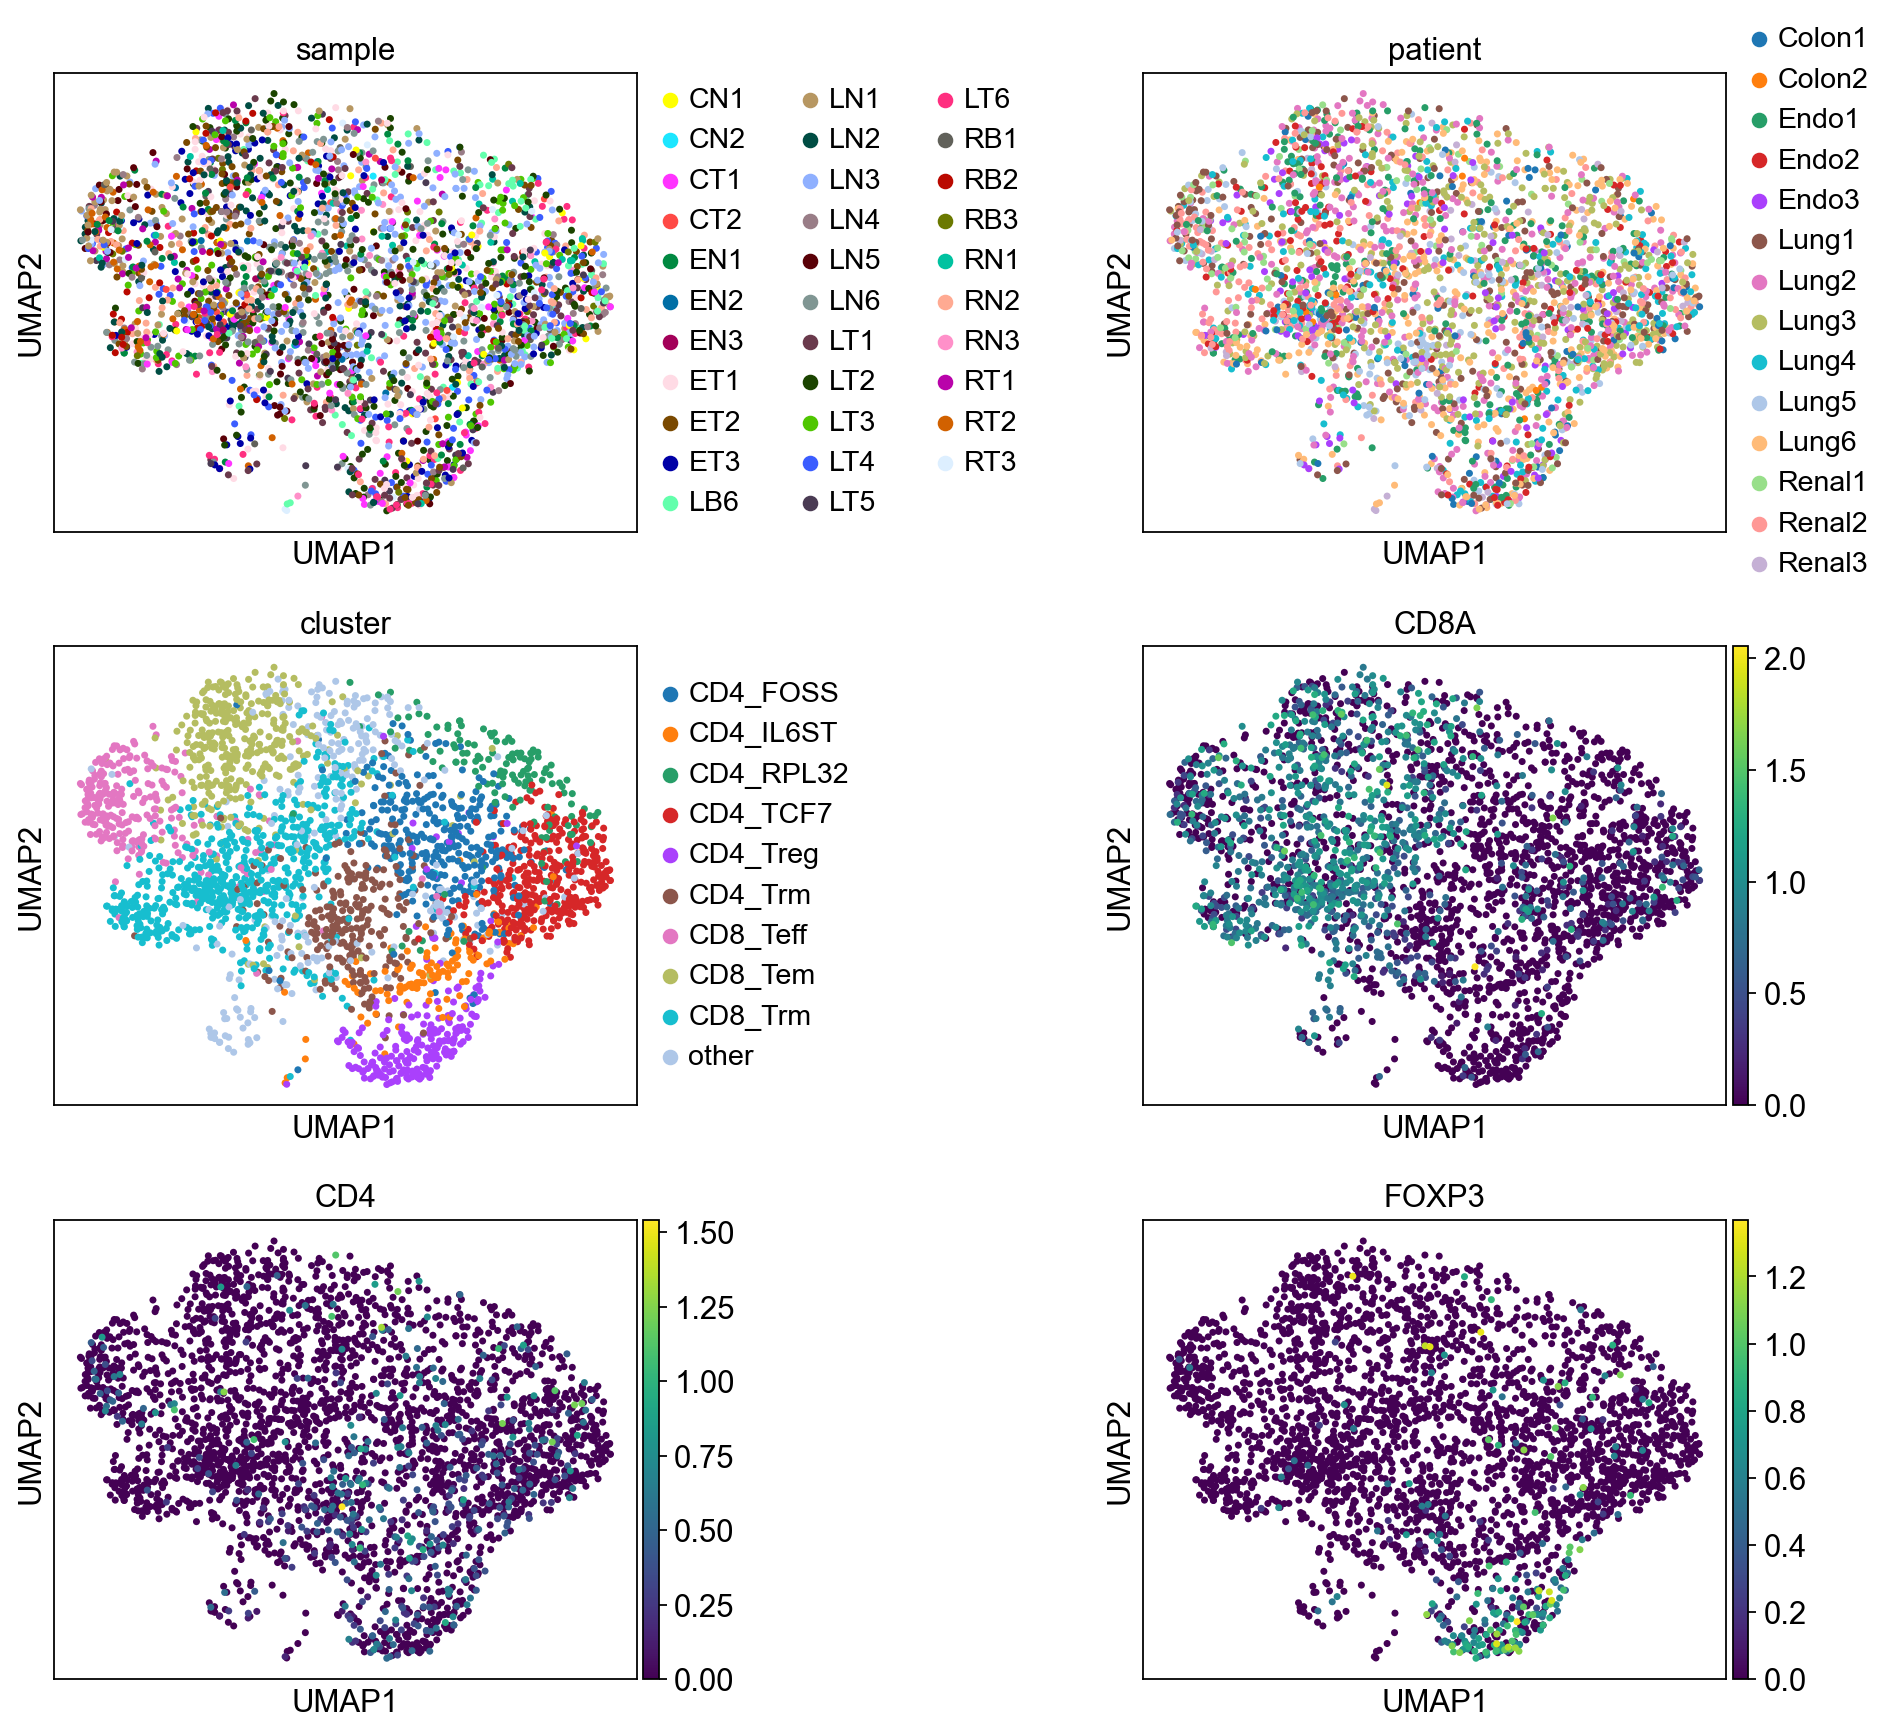

In [10]:
sc.pl.umap(
    adata,
    color=["sample", "patient", "cluster", "CD8A", "CD4", "FOXP3"],
    ncols=2,
    wspace=0.7,
)

TCR Quality Control
While most of T cell receptors have exactly one pair of α and β chains, up to one third of T cells can have dual TCRs, i.e. two pairs of receptors originating from different alleles (Schuldt et al (2019)).

Using the scirpy.tl.chain_pairing function, we can add a summary about the T cell receptor compositions to adata.obs.

Orphan chain refers to cells that have either a single alpha or beta receptor chain.
Extra chain refers to cells that have a full alpha/beta receptor pair, and an additional chain.
Multichain refers to cells with more than two receptor pairs detected. These cells are likely doublets.

In [11]:
ir.tl.chain_qc(adata)

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'receptor_type' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'receptor_subtype' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categ

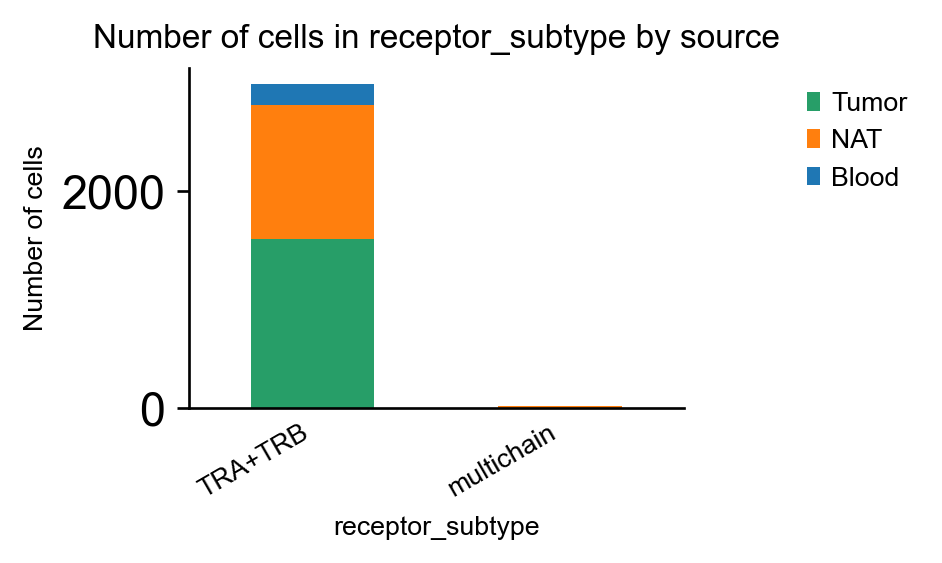

In [12]:
ax = ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="source")

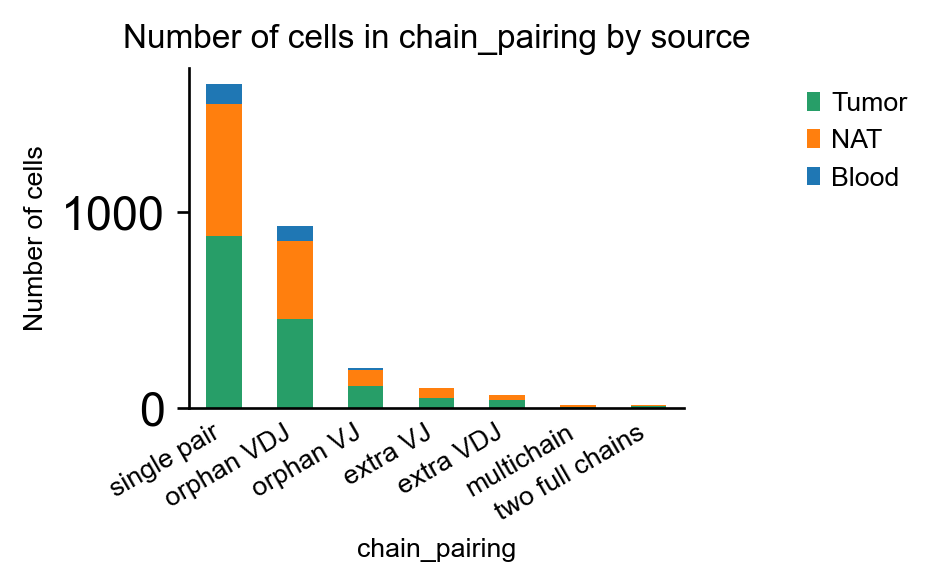

In [13]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

In [14]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.06


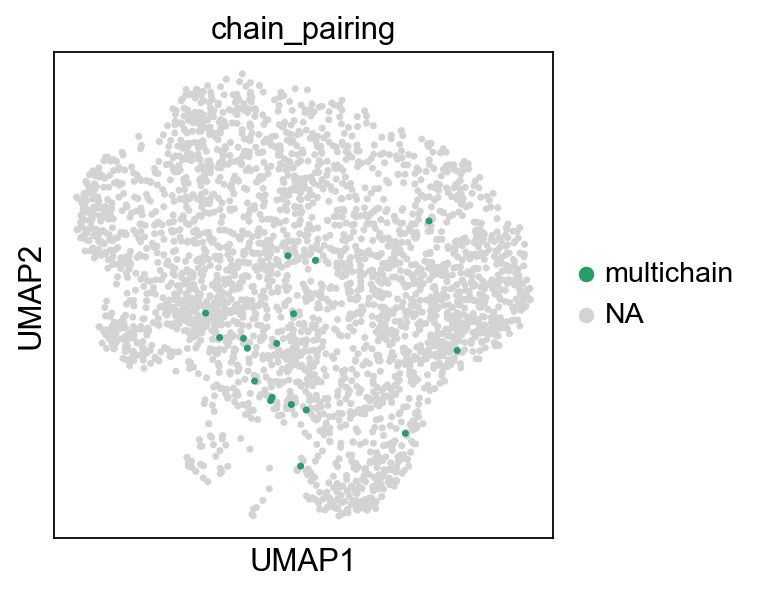

In [15]:
sc.pl.umap(adata, color="chain_pairing", groups="multichain")

In [16]:
# Drop multichain instances
adata = adata[adata.obs["chain_pairing"] != "multichain", :].copy()

In [17]:
# Drop single chain instances
adata = adata[~adata.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()

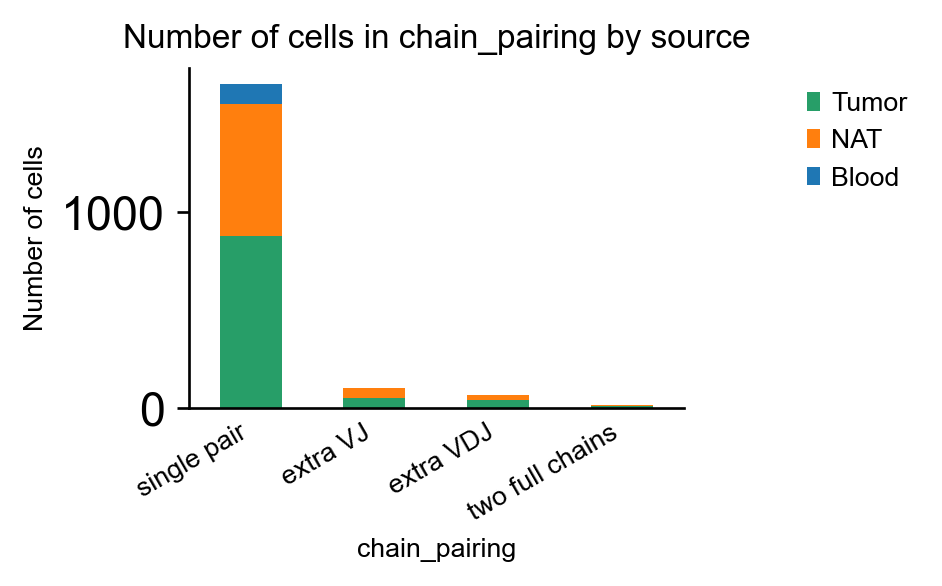

In [18]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

Compute CDR3 neighborhood graph and define clonotypes
scirpy.pp.ir_dist() computes distances between CDR3 nucleotide (nt) or amino acid (aa) sequences, either based on sequence identity or similarity. It creates two distance matrices: one for all unique VJ sequences and one for all unique VDJ sequences. The distance matrices are added to adata.uns.

The function scirpy.tl.define_clonotypes() matches cells based on the distances of their VJ and VDJ CDR3-sequences and value of the function parameters dual_ir and receptor_arms. Finally, it detects connected modules in the graph and annotates them as clonotypes. This will add a clone_id and clone_id_size column to adata.obs.

The dual_ir parameter defines how scirpy handles cells with more than one pair of receptors. The default value is any which implies that cells with any of their primary or secondary receptor chain matching will be considered to be of the same clonotype.

Here, we define clonotypes based on nt-sequence identity. In a later step, we will define clonotype clusters based on amino-acid similarity.

In [19]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata)
ir.tl.define_clonotypes(adata, receptor_arms="all", dual_ir="primary_only")
ir.tl.clonotype_network(adata, min_cells=2)

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1526/1526 [00:02<00:00, 707.94it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


To visualize the network we first call scirpy.tl.clonotype_network() to compute the layout. We can then visualize it using scirpy.pl.clonotype_network(). We recommend setting the min_cells parameter to >=2, to prevent the singleton clonotypes from cluttering the network.

In [20]:
ir.tl.clonotype_network(adata, min_cells=2)

The resulting plot is a network, where each dot represents cells with identical receptor configurations. As we define clonotypes as cells with identical CDR3-sequences, each dot is also a clonotype. For each clonotype, the numeric clonotype id is shown in the graph. The size of each dot refers to the number of cells with the same receptor configurations. Categorical variables can be visualized as pie charts.

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clone_id' as categorical


<AxesSubplot:>

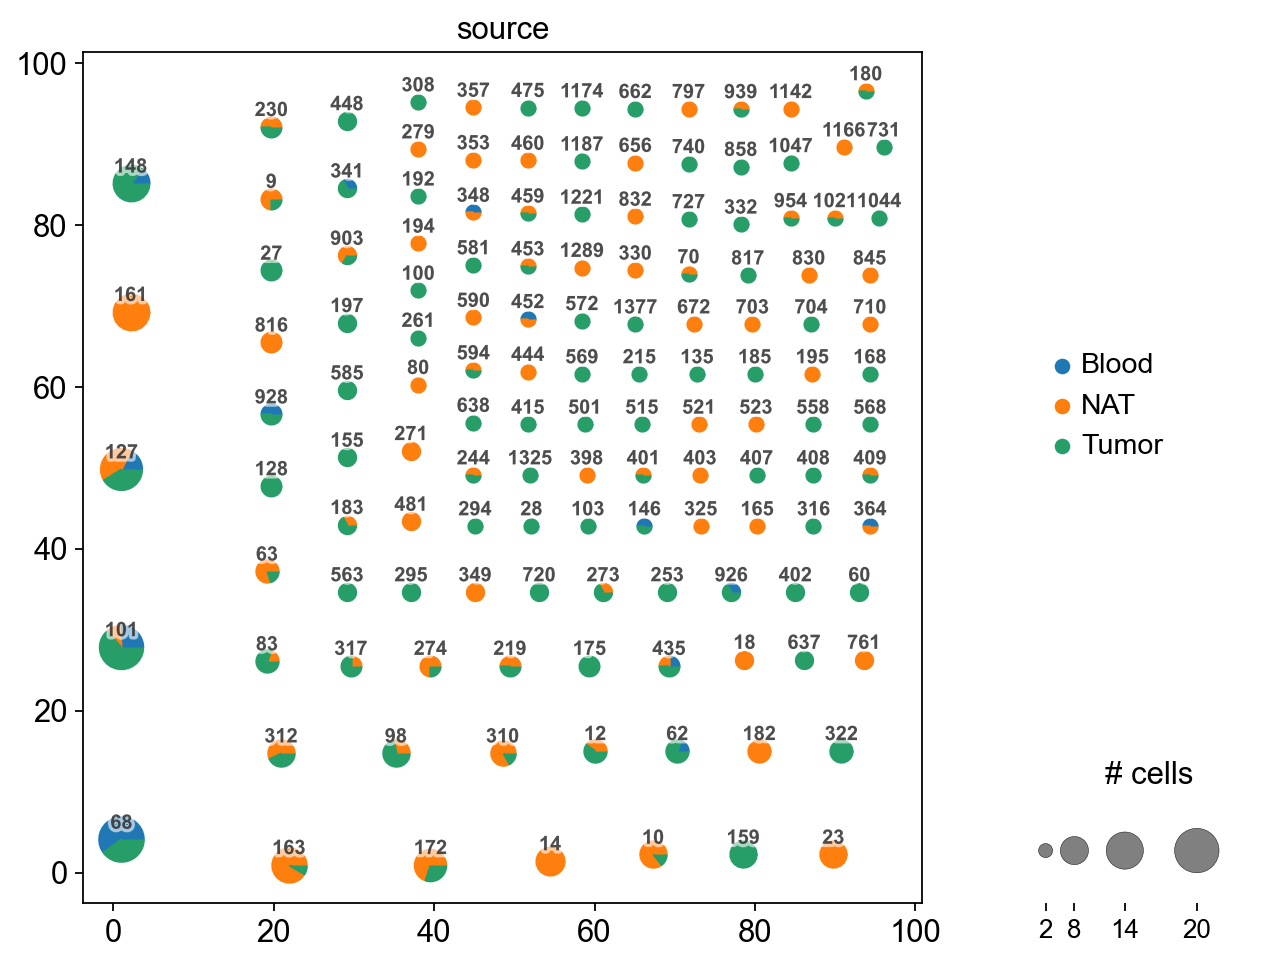

In [21]:
ir.pl.clonotype_network(
    adata, color="source", base_size=20, label_fontsize=9, panel_size=(7, 7)
)

Re-compute CDR3 neighborhood graph and define clonotype clusters
We can now re-compute the clonotype network based on amino-acid sequence similarity and define clonotype clusters.

To this end, we need to change set metric=”alignment” and specify a cutoff parameter. The distance is based on the BLOSUM62 matrix. For instance, a distance of 10 is equivalent to 2 R`s mutating into `N. This appoach was initially proposed as TCRdist by Dash et al. ([DFGH+17]).

All cells with a distance between their CDR3 sequences lower than cutoff will be connected in the network.

In [22]:
ir.pp.ir_dist(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.


100%|██████████| 496/496 [00:14<00:00, 35.35it/s]


Computing sequence x sequence distance matrix for VDJ sequences.


100%|██████████| 496/496 [00:14<00:00, 35.08it/s]


In [23]:
ir.tl.define_clonotype_clusters(
    adata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1549/1549 [00:06<00:00, 247.68it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [24]:
ir.tl.clonotype_network(adata, min_cells=3, sequence="aa", metric="alignment")

Compared to the previous plot, we observere several connected dots. Each fully connected subnetwork represents a “clonotype cluster”, each dot still represents cells with identical receptor configurations.

The dots are colored by patient. We observe, that for instance, clonotypes 101 and 68 (left top and bottom) are private, i.e. they contain cells from a single patient only. On the other hand, clonotype 159 (left middle) is public, i.e. it is shared across patients Lung1 and Lung3.

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cc_aa_alignment' as categorical


<AxesSubplot:>

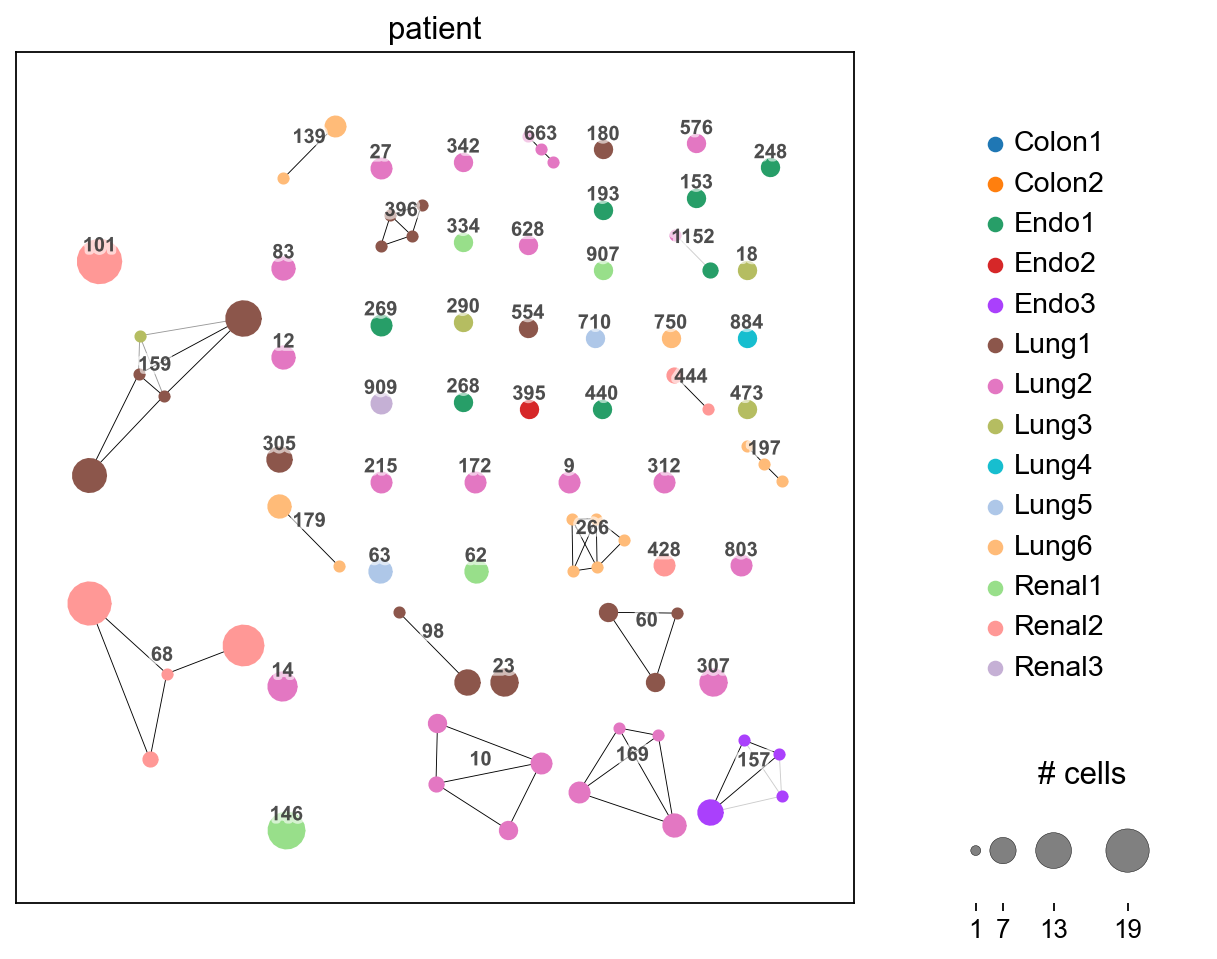

In [25]:
ir.pl.clonotype_network(
    adata, color="patient", label_fontsize=9, panel_size=(7, 7), base_size=20
)

We can now extract information (e.g. CDR3-sequences) from a specific clonotype cluster by subsetting AnnData. When extracting the CDR3 sequences of clonotype cluster 159, we retreive five different receptor configurations with different numbers of cells, corresponding to the five points in the graph.

In [26]:
adata.obs.loc[adata.obs["cc_aa_alignment"] == "159", :].groupby(
    [
        "IR_VJ_1_junction_aa",
        "IR_VJ_2_junction_aa",
        "IR_VDJ_1_junction_aa",
        "IR_VDJ_2_junction_aa",
        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

IR_VJ_1_junction_aa IR_VJ_2_junction_aa IR_VDJ_1_junction_aa  \
0       CAGKSGNTGKLIF                None        CASSYQGATEAFF   
1       CAGKSGNTGKLIF     CATDPRRSTGNQFYF        CASSYQGATEAFF   
2     CATDPRRSTGNQFYF                None        CASSYQGATEAFF   
3     CATDPRRSTGNQFYF       CAGKSGNTGKLIF        CASSYQGATEAFF   
4       CAGKAGNTGKLIF                None        CASSYQGSTEAFF   

  IR_VDJ_2_junction_aa receptor_subtype  n_cells  
0                 None          TRA+TRB       12  
1                 None          TRA+TRB        1  
2                 None          TRA+TRB       11  
3                 None          TRA+TRB        1  
4                 None          TRA+TRB        1

Including the V-gene in clonotype definition:

Using the paramter use_v_gene in define_clonotypes(), we can enforce clonotypes (or clonotype clusters) to have the same V-gene, and, therefore, the same CDR1 and 2 regions. Let’s look for clonotype clusters with different V genes:

In [27]:
ir.tl.define_clonotype_clusters(
    adata,
    sequence="aa",
    metric="alignment",
    receptor_arms="all",
    dual_ir="any",
    same_v_gene=True,
    key_added="cc_aa_alignment_same_v",
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1549/1549 [00:07<00:00, 221.06it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment_same_v"]`.


In [28]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = adata.obs.groupby("cc_aa_alignment").apply(
    lambda x: x["cc_aa_alignment_same_v"].nunique() > 1
)
ct_different_v = ct_different_v[ct_different_v].index.values.tolist()
ct_different_v

['280', '765']

Here, we see that the clonotype clusters 280 and 765 get split into (280, 788) and (765, 1071), respectively, when the same_v_gene flag is set.

In [29]:
adata.obs.loc[
    adata.obs["cc_aa_alignment"].isin(ct_different_v),
    [
        "cc_aa_alignment",
        "cc_aa_alignment_same_v",
        "IR_VJ_1_v_call",
        "IR_VDJ_1_v_call",
    ],
].sort_values("cc_aa_alignment").drop_duplicates().reset_index(drop=True)

cc_aa_alignment cc_aa_alignment_same_v IR_VJ_1_v_call IR_VDJ_1_v_call
0             280                    280        TRAV8-6         TRBV6-6
1             280                    788        TRAV8-3           TRBV9
2             765                    765         TRAV21         TRBV6-6
3             765                   1071         TRAV21         TRBV6-5

Clonotype analysis:

Clonal expansion:
Let’s visualize the number of expanded clonotypes (i.e. clonotypes consisting of more than one cell) by cell-type. The first option is to add a column with the scirpy.tl.clonal_expansion() to adata.obs and overlay it on the UMAP plot.

In [30]:
ir.tl.clonal_expansion(adata)

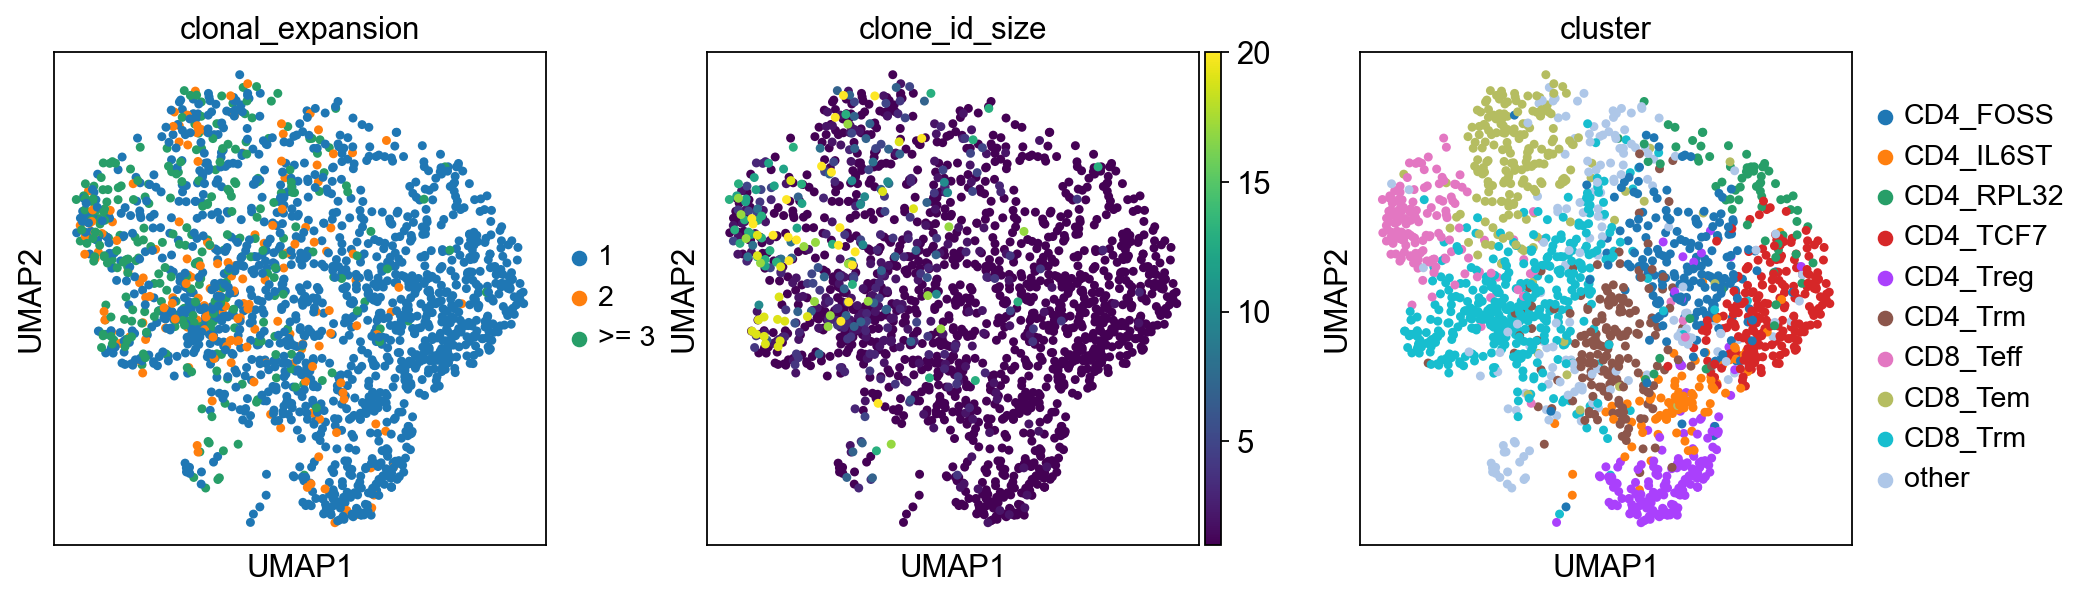

In [34]:
sc.pl.umap(adata, color=["clonal_expansion", "clone_id_size","cluster"])

The second option is to show the number of cells belonging to an expanded clonotype per category in a stacked bar plot, using the scirpy.pl.clonal_expansion() plotting function.

<AxesSubplot:>

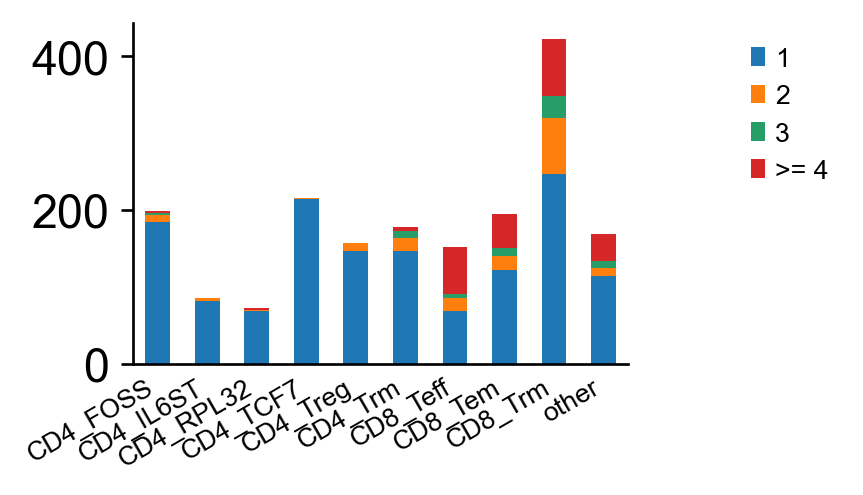

In [35]:
ir.pl.clonal_expansion(adata, groupby="cluster", clip_at=4, normalize=False)

The same plot, normalized to cluster size. Clonal expansion is a sign of positive selection for a certain, reactive T-cell clone. It, therefore, makes sense that CD8+ effector T-cells have the largest fraction of expanded clonotypes.

<AxesSubplot:>

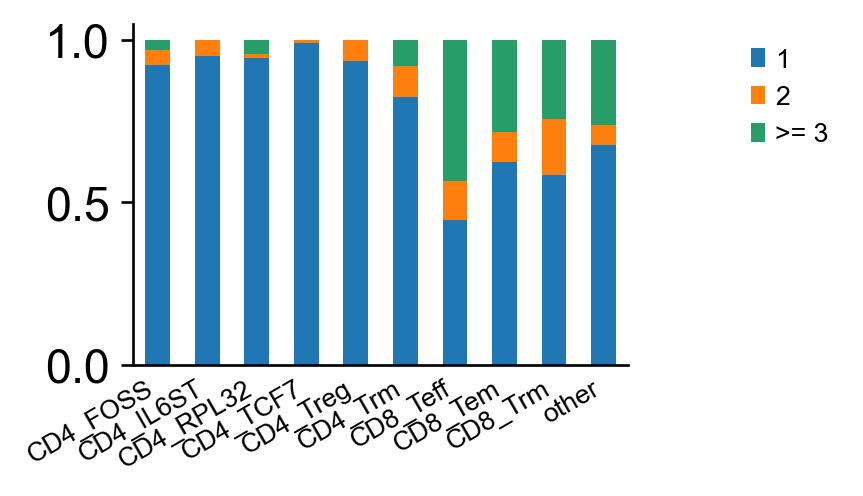

In [36]:
ir.pl.clonal_expansion(adata, "cluster")

Expectedly, the CD8+ effector T cells have the largest fraction of expanded clonotypes.

Consistent with this observation, they have the lowest scirpy.pl.alpha_diversity() of clonotypes.

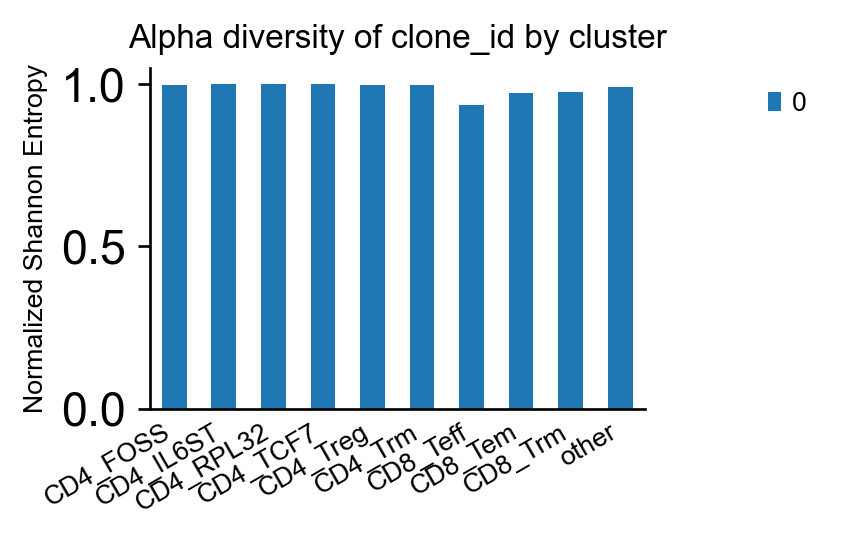

In [37]:
ax = ir.pl.alpha_diversity(
    adata, metric="normalized_shannon_entropy", groupby="cluster"
)

Clonotype abundance
The function scirpy.pl.group_abundance() allows us to create bar charts for arbitrary categorial from obs. Here, we use it to show the distribution of the ten largest clonotypes across the cell-type clusters

<AxesSubplot:title={'center':'Number of cells in clone_id by cluster'}, xlabel='clone_id', ylabel='Number of cells'>

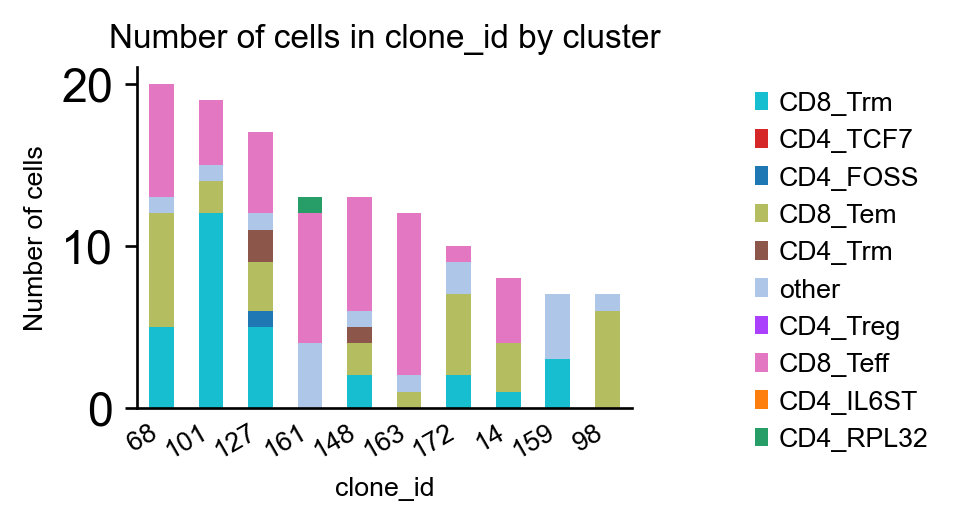

In [38]:
ir.pl.group_abundance(adata, groupby="clone_id", target_col="cluster", max_cols=10)

It might be beneficial to normalize the counts to the number of cells per sample to mitigate biases due to different sample sizes:

<AxesSubplot:title={'center':'Fraction of cluster in each clone_id'}, xlabel='clone_id', ylabel='Fraction of cells in sample'>

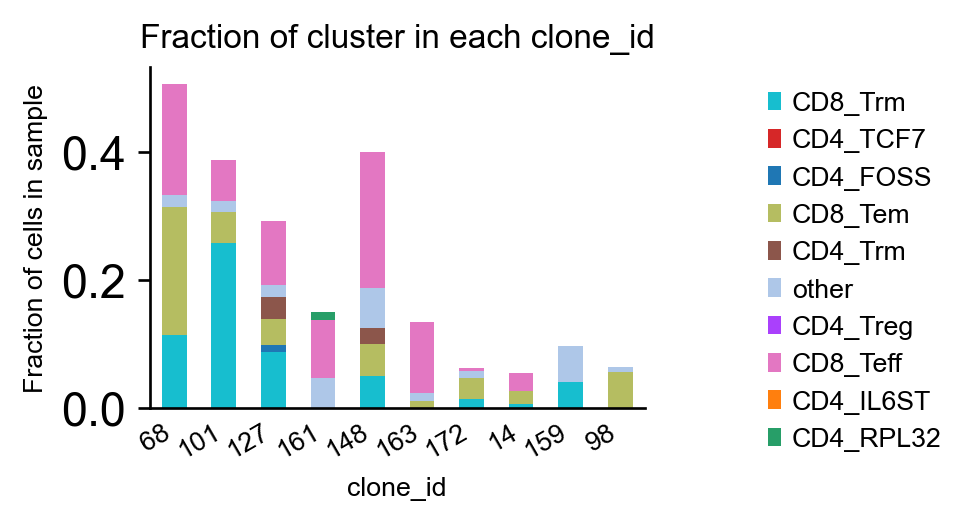

In [39]:
ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="cluster", max_cols=10, normalize="sample"
)

Coloring the bars by patient gives us information about public and private clonotypes: Some clonotypes are private, i.e. specific to a certain tissue, others are public, i.e. they are shared across different tissues.

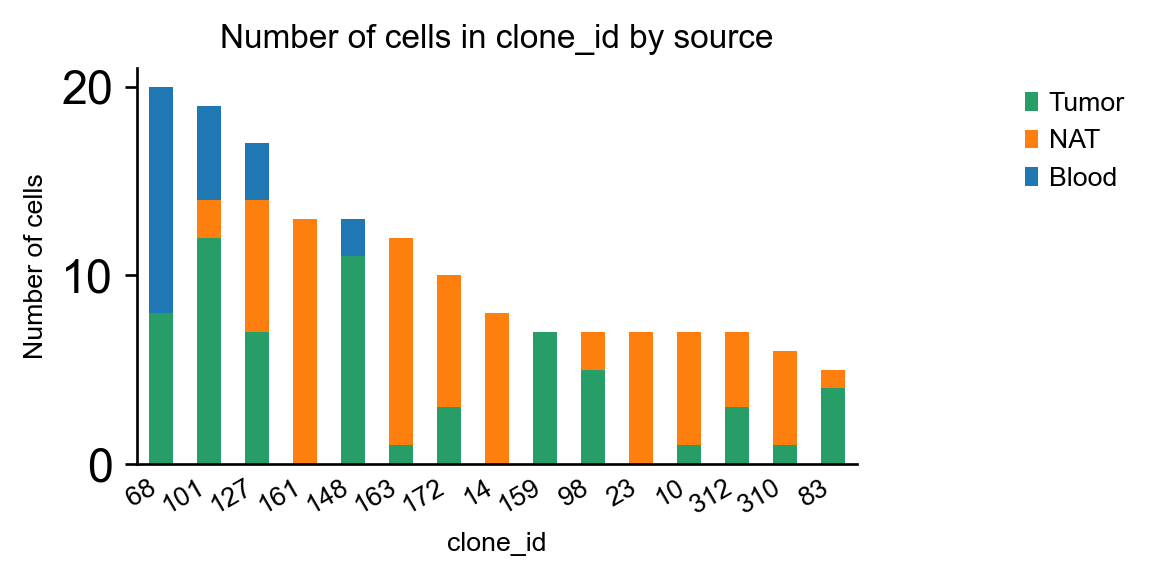

In [40]:
ax = ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="source", max_cols=15, figsize=(5, 3)
)

However, clonotypes that are shared between patients are rare:

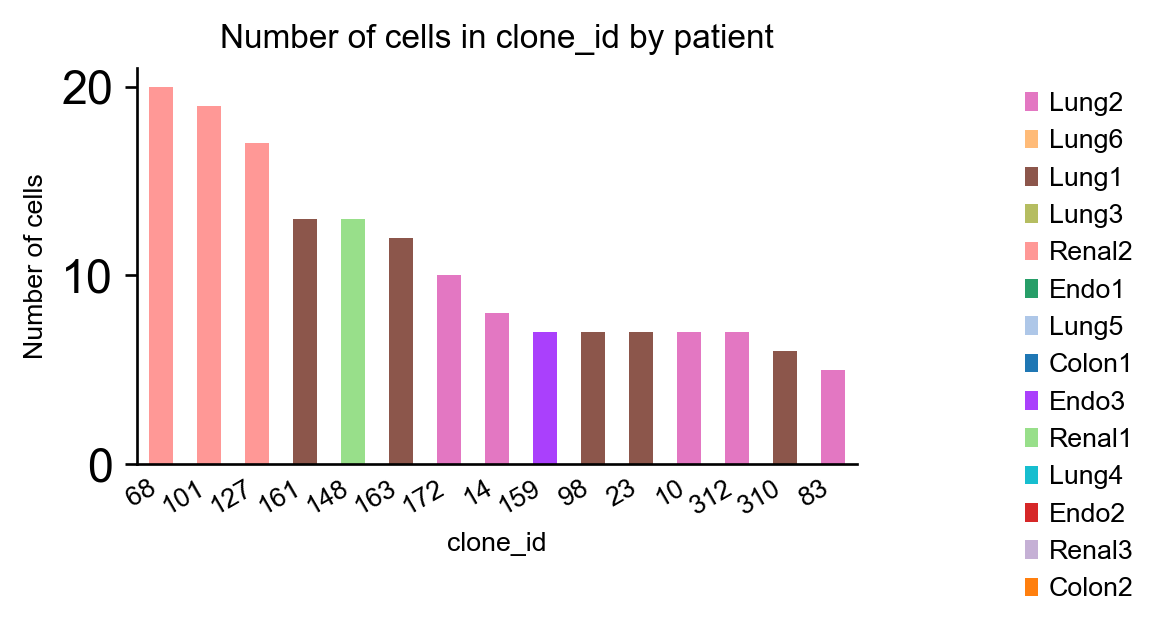

In [41]:
ax = ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="patient", max_cols=15, figsize=(5, 3)
)

Gene usage
scirpy.tl.group_abundance() can also give us some information on VDJ usage. We can choose any of the {TRA,TRB}_{1,2}_{v,d,j,c}_gene columns to make a stacked bar plot. We use max_col to limit the plot to the 10 most abundant V-genes.

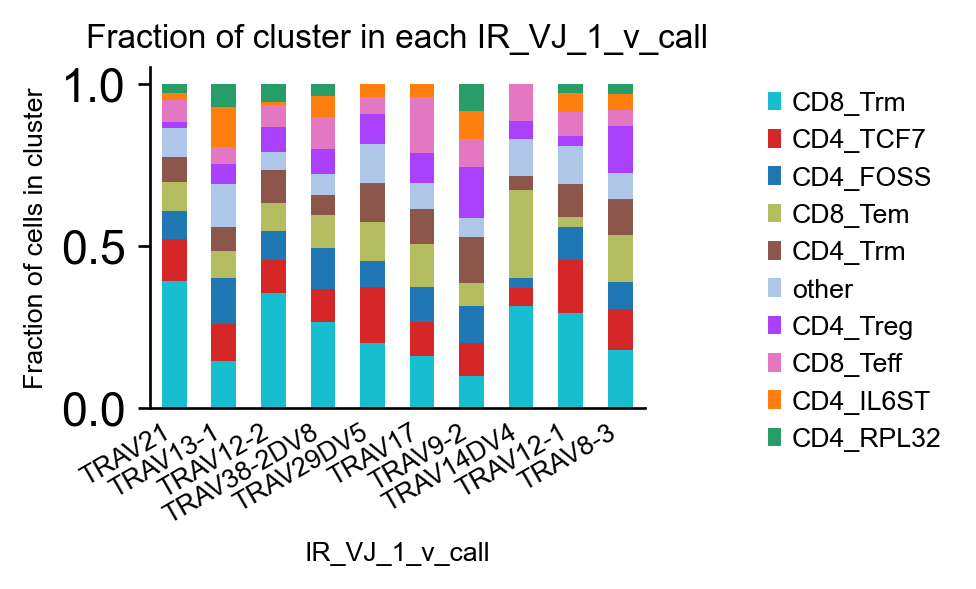

In [42]:
ax = ir.pl.group_abundance(
    adata, groupby="IR_VJ_1_v_call", target_col="cluster", normalize=True, max_cols=10
)

We can pre-select groups by filtering adata:

Trying to set attribute `._uns` of view, copying.


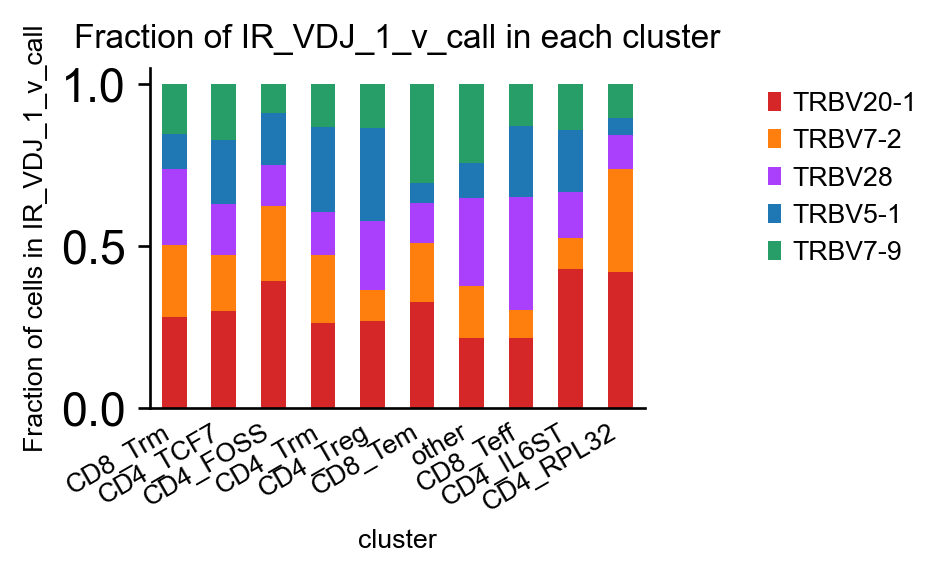

In [43]:
ax = ir.pl.group_abundance(
    adata[
        adata.obs["IR_VDJ_1_v_call"].isin(
            ["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]
        ),
        :,
    ],
    groupby="cluster",
    target_col="IR_VDJ_1_v_call",
    normalize=True,
)

The exact combinations of VDJ genes can be visualized as a Sankey-plot using scirpy.pl.vdj_usage().

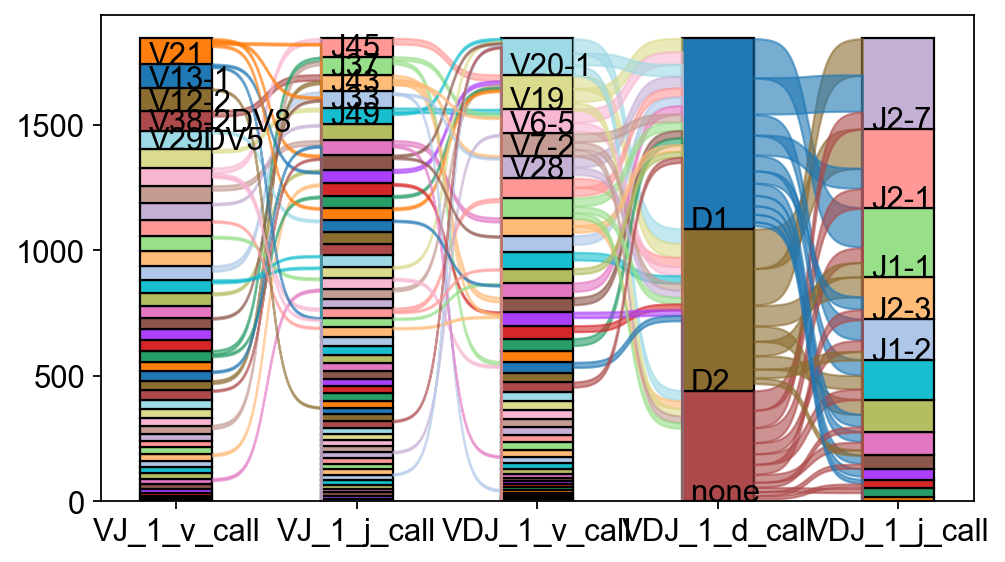

In [44]:
ax = ir.pl.vdj_usage(adata, full_combination=False, max_segments=None, max_ribbons=30)

We can also use this plot to investigate the exact VDJ composition of one (or several) clonotypes:

<AxesSubplot:>

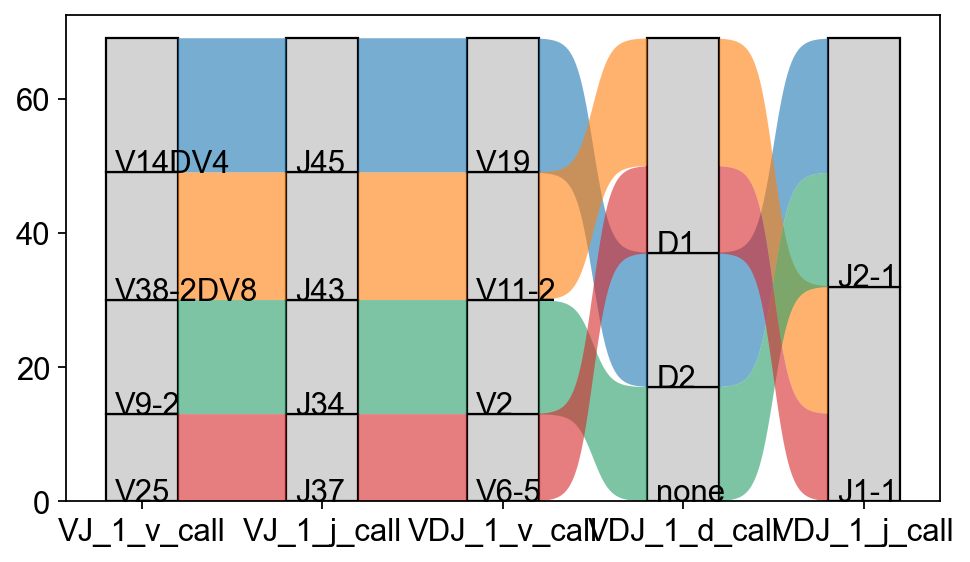

In [45]:
ir.pl.vdj_usage(
    adata[adata.obs["clone_id"].isin(["68", "101", "127", "161"]), :],
    max_ribbons=None,
    max_segments=100,
)

Spectratype plots:
spectratype() plots give us information about the length distribution of CDR3 regions.

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by cluster'}, xlabel='IR_VJ_1_junction_aa length', ylabel='Number of cells'>

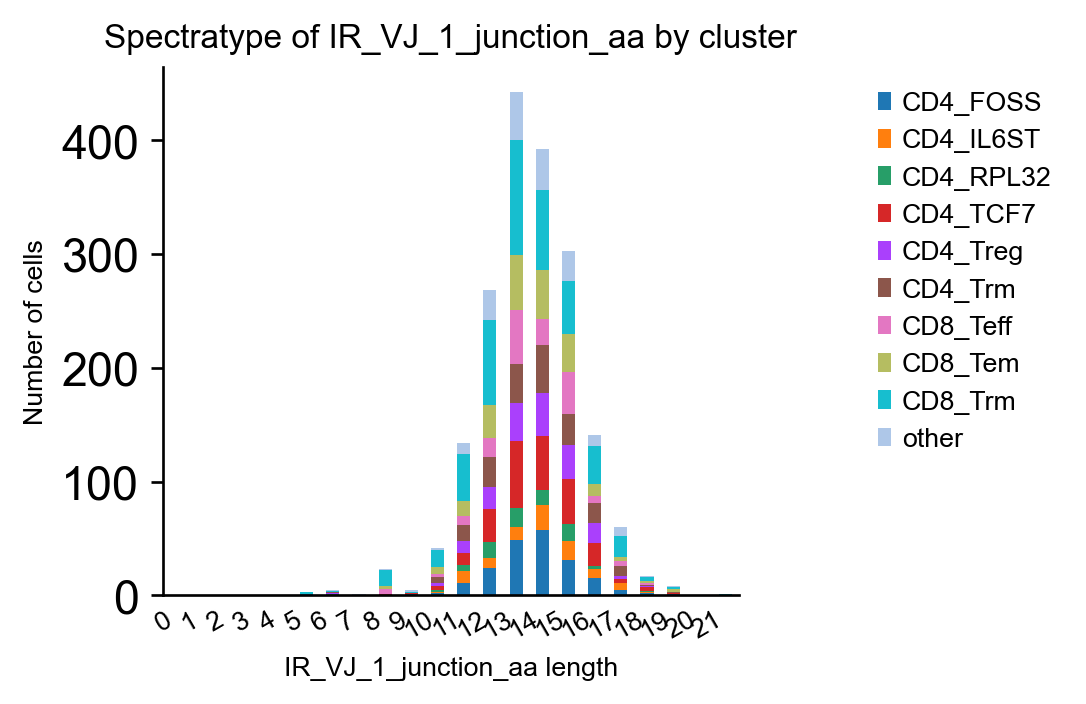

In [46]:
ir.pl.spectratype(adata, color="cluster", viztype="bar", fig_kws={"dpi": 120})

The same chart visualized as “ridge”-plot:

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/scirpy/pl/base.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by cluster'}, xlabel='IR_VJ_1_junction_aa length'>

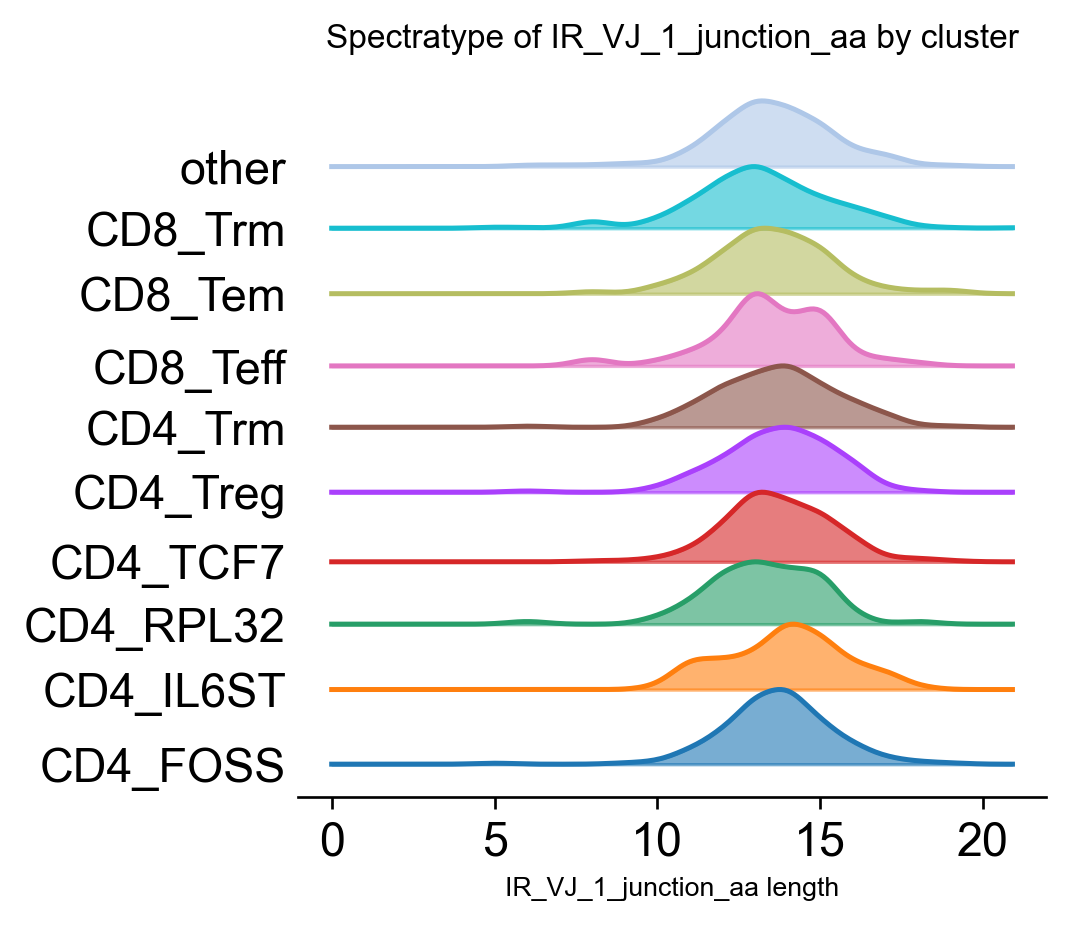

In [47]:
ir.pl.spectratype(
    adata,
    color="cluster",
    viztype="curve",
    curve_layout="shifted",
    fig_kws={"dpi": 120},
    kde_kws={"kde_norm": False},
)

A spectratype-plot by gene usage. To pre-select specific genes, we can simply filter the adata object before plotting

Trying to set attribute `._uns` of view, copying.


<AxesSubplot:title={'center':'Spectratype of IR_VDJ_1_junction_aa by IR_VDJ_1_v_call'}, xlabel='IR_VDJ_1_junction_aa length', ylabel='Fraction of cells in sample'>

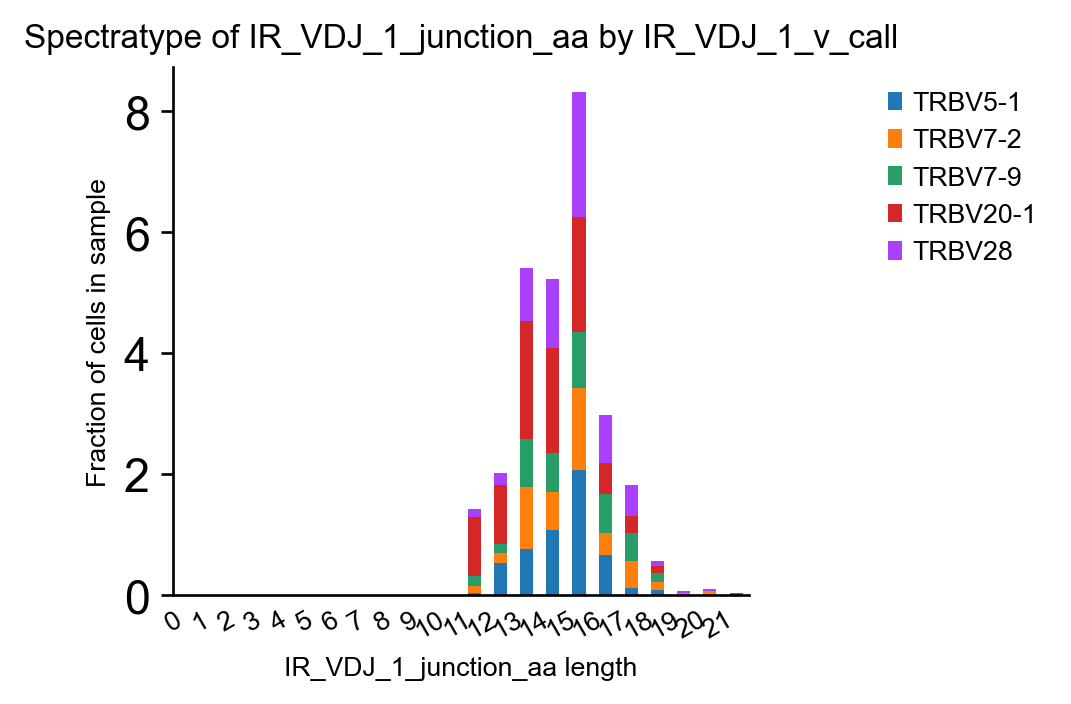

In [48]:
ir.pl.spectratype(
    adata[
        adata.obs["IR_VDJ_1_v_call"].isin(
            ["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]
        ),
        :,
    ],
    cdr3_col="IR_VDJ_1_junction_aa",
    color="IR_VDJ_1_v_call",
    normalize="sample",
    fig_kws={"dpi": 120},
)

Comparing repertoires:
Repertoire simlarity and overlaps:
Overlaps in the adaptive immune receptor repertoire of samples or sample groups enables to pinpoint important clonotype groups, as well as to provide a measure of similarity between samples. Running Scirpy’s repertoire_overlap() tool creates a matrix featuring the abundance of clonotypes in each sample. Additionally, it also computes a (Jaccard) distance matrix of samples as well as the linkage of hierarchical clustering.

In [49]:
df, dst, lk = ir.tl.repertoire_overlap(adata, "sample", inplace=False)
df.head()

clone_id    0    1    2    3    4    5    6    7    8    9  ...  1516  1517  \
sample                                                      ...               
CN1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
CT1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
CT2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
EN1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
EN2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

clone_id  1518  1519  1520  1521  1522  1523  1524  1525  
sample                                                    
CN1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
CT1        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
CT2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
EN1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
EN2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1526 columns]

The distance matrix can be shown as a heatmap, while samples are reordered based on hierarchical clustering.

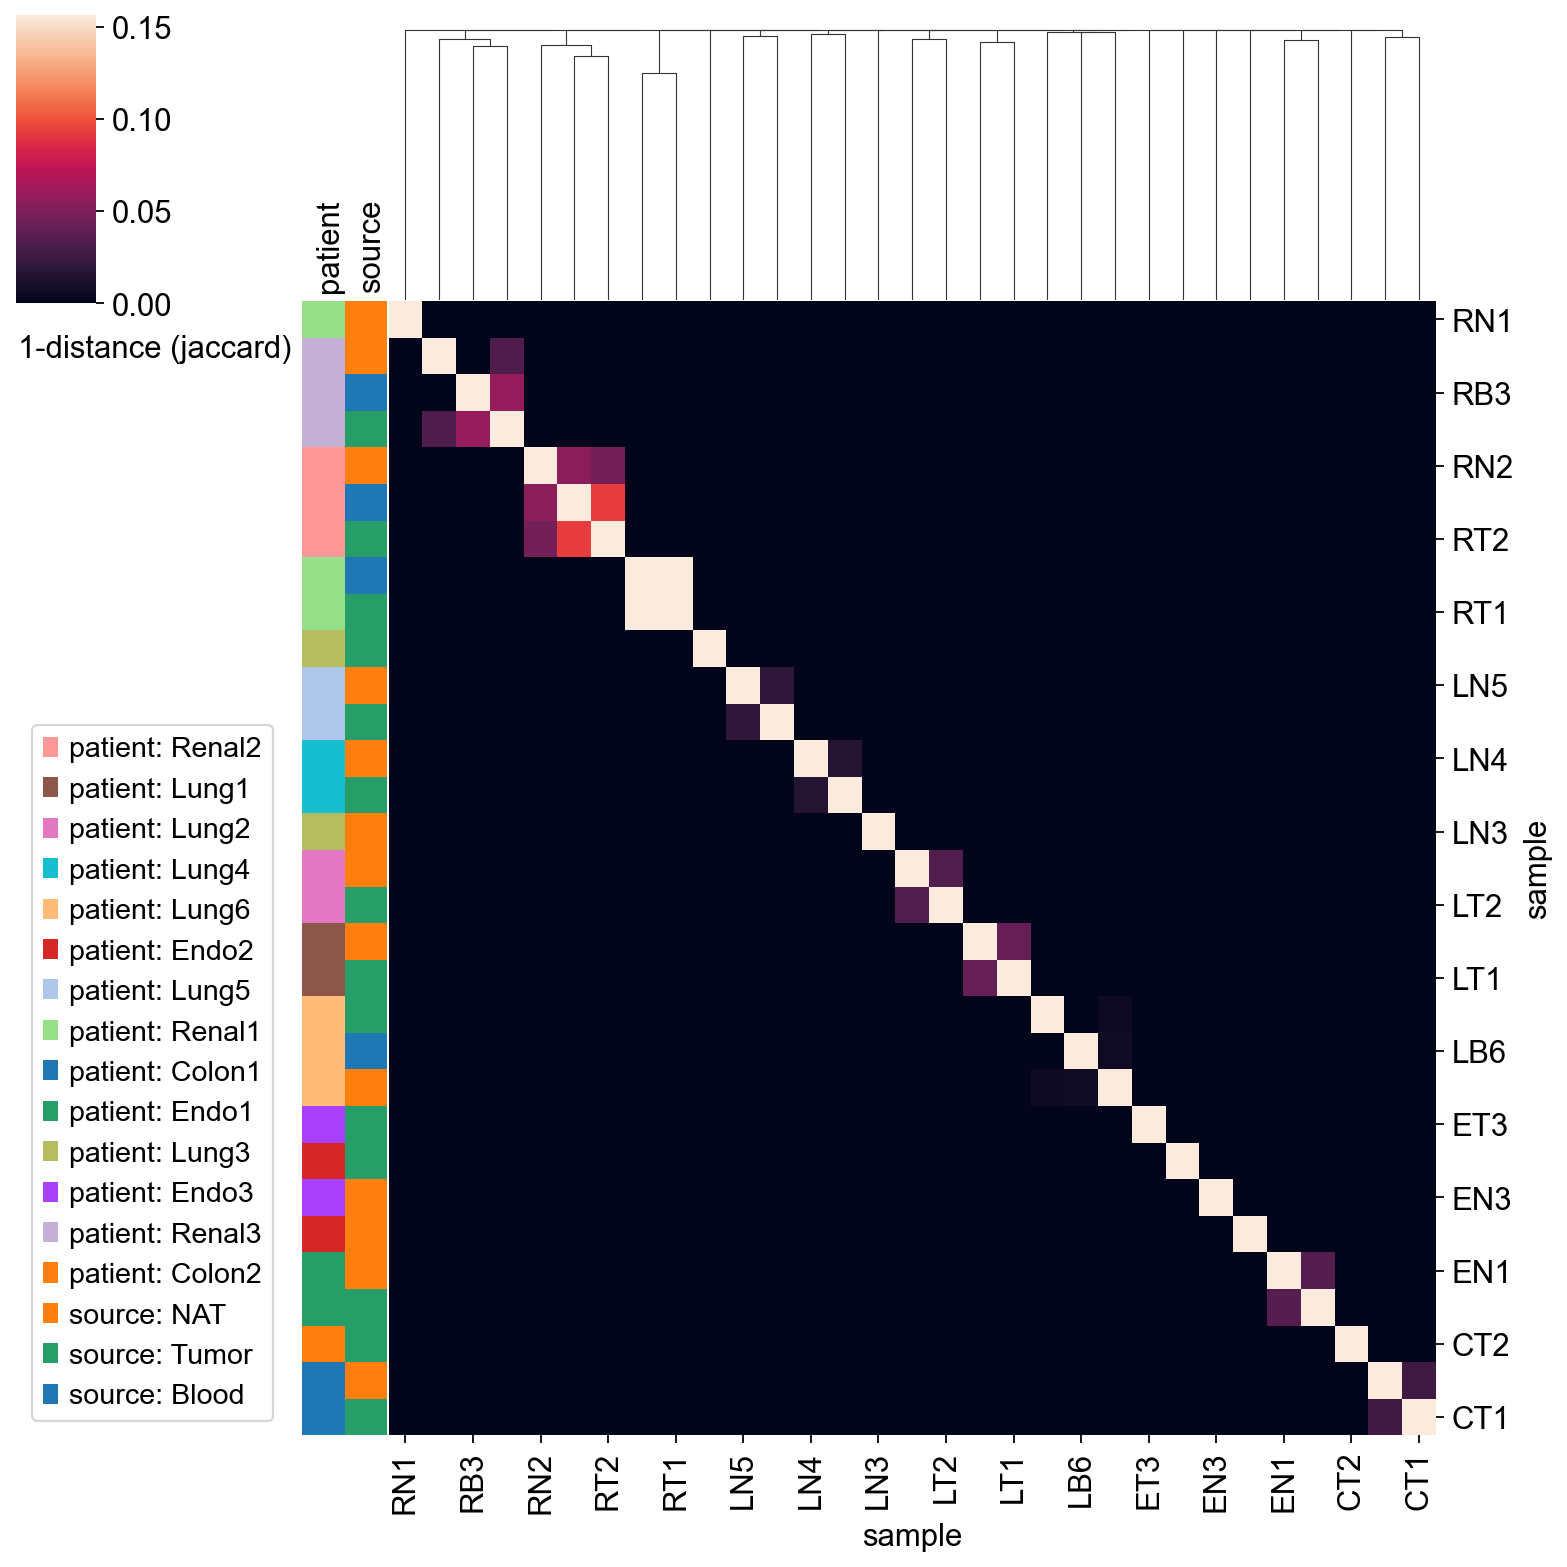

In [50]:
ir.pl.repertoire_overlap(adata, "sample", heatmap_cats=["patient", "source"])

A specific pair of samples can be compared on a scatterplot, where dot size corresponds to the number of clonotypes at a given coordinate.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN2 and LT2'}, xlabel='Clonotype size in LN2', ylabel='Clonotype size in LT2'>

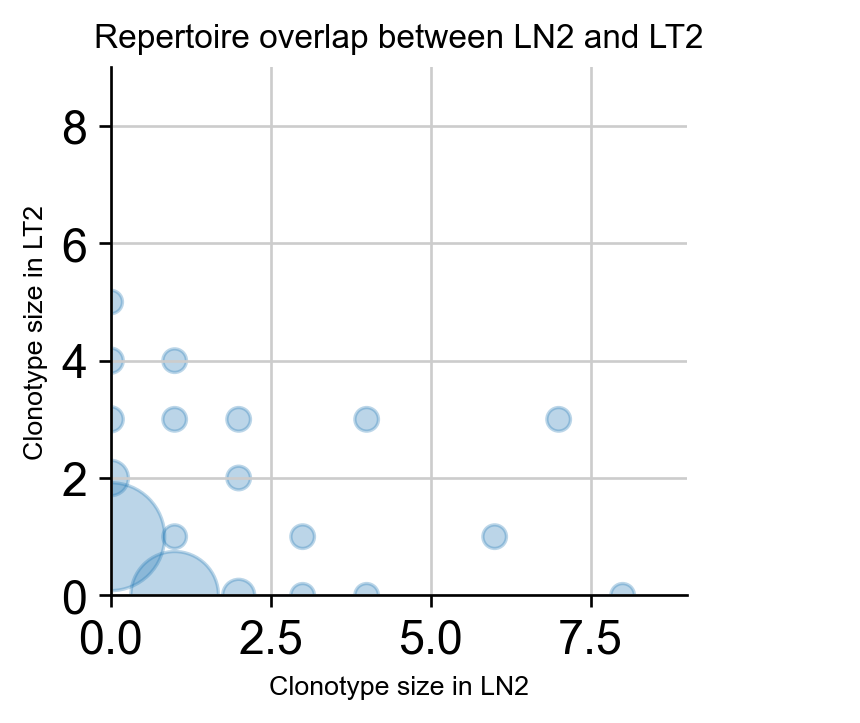

In [53]:
ir.pl.repertoire_overlap(
    adata, "sample", pair_to_plot=["LN2", "LT2"], fig_kws={"dpi": 120}
)

In [ ]:
# To Do - integrating Gene expression data

Query epitope databases:
We can use scirpy to query reference databases or datasets to annotate IRs with certain features, such as epitope specificity. The reference database can be any dataset in scirpy’s AnnData format and you can follow the instructions in the data loading tutorial to build a custom reference database, if it is not available from scirpy.datasets yet.

Querying reference datasets uses the same logic as defining clonotypes:


scirpy function                    Objective

scirpy.pp.ir_dist()                Compute sequence-based distance matrices .

scirpy.tl.ir_query()               For each cell, identify matching entries in a reference database.

scirpy.tl.ir_query_annotate()      Transfer annotations from reference database to adata.obs.

scirpy.tl.ir_query_annotate_df()   Return a dataframe with all matching annotations.

Here, we obtain the VDJDB and annotate epitopes based on amino acid sequence identity. For demonstration purposes on this toy dataset we use rather lenient settings: For a match, we specify that it is enough that either of the VJ and VDJ sequences, and either of the primary or secondary receptor chains matches the database.

In [54]:
vdjdb = ir.datasets.vdjdb()

/var/folders/rn/d8fnv5qx1tn2vqzsj5c5dftw0000gn/T/ipykernel_6578/915710121.py:1: DtypeWarning: Columns (20,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  vdjdb = ir.datasets.vdjdb()
Processing VDJDB entries: 100%|██████████| 55586/55586 [00:10<00:00, 5396.40it/s]

Converting to AnnData object



/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'species' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=T

In [55]:
vdjdb

AnnData object with n_obs × n_vars = 55586 × 0
    obs: 'multi_chain', 'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'reference.id', 'method.identification', 'method.frequency', 'method.singlecell', 'method.sequencing', 'method.verification', 'meta.study.id', 'meta.cell.subset', 'meta.subject.cohort', 'meta.subject.id', 'meta.replica.id', 'meta.clone.id', 'meta.epitope.id', 'meta.tissue', 'meta.donor.MHC', 'meta.donor.MHC.method', 'meta.structure.id', 'vdjdb.score', 'extra_chains', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_germline_alignment', 'IR_VJ_2_germline_alignment', 'IR_VDJ_1_germline_alignment', 'IR_VDJ_2_germline_alignment', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_V

In [56]:
ir.pp.ir_dist(adata, vdjdb, metric="identity", sequence="aa")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.


In [57]:
ir.tl.ir_query(
    adata, vdjdb, metric="identity", sequence="aa", receptor_arms="any", dual_ir="any"
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1549/1549 [00:03<00:00, 389.79it/s]


Stored IR distance matrix in `adata.uns["ir_query_VDJDB_aa_identity"]`.


ir_query_annotate_df() allows us to retrieve all pairs cells with their of matching entries. If a cell matches multiple entires from the reference database, the resulting data frame will contain multiple rows for the same cell.

In [79]:
vdjdb

AnnData object with n_obs × n_vars = 55586 × 0
    obs: 'multi_chain', 'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'reference.id', 'method.identification', 'method.frequency', 'method.singlecell', 'method.sequencing', 'method.verification', 'meta.study.id', 'meta.cell.subset', 'meta.subject.cohort', 'meta.subject.id', 'meta.replica.id', 'meta.clone.id', 'meta.epitope.id', 'meta.tissue', 'meta.donor.MHC', 'meta.donor.MHC.method', 'meta.structure.id', 'vdjdb.score', 'extra_chains', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_d_cigar', 'IR_VJ_2_d_cigar', 'IR_VDJ_1_d_cigar', 'IR_VDJ_2_d_cigar', 'IR_VJ_1_germline_alignment', 'IR_VJ_2_germline_alignment', 'IR_VDJ_1_germline_alignment', 'IR_VDJ_2_germline_alignment', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_V

In [124]:
ir.tl.ir_query_annotate_df(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species", "antigen.gene","antigen.epitope"],
).tail()

antigen.species antigen.gene antigen.epitope
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1       KLGGALQAK
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1       KLGGALQAK
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1       KLGGALQAK
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1       KLGGALQAK
RT3_TCTCTAATCACAATGC-1-6      InfluenzaA           NP    DATYQRTRALVR

In [121]:
adata

AnnData object with n_obs × n_vars = 1845 × 11850
    obs: 'cluster_orig', 'patient', 'sample', 'source', 'clonotype_orig', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'has_ir', 'batch', 'extra_chains', 'n_genes', 'n_counts', 'cluster', 'receptor_type', 'receptor_subtype', 'chai

Alternatively, to break down the annotation to a single-value per cell, you can use ir_query_annotate(). Depending on the specified strategy it will only label unambiguous matches, or use the most frequent value.

In [125]:
ir.tl.ir_query_annotate(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.epitope"],
    strategy="most-frequent",
)

100%|██████████| 303/303 [00:00<00:00, 3811.65it/s]


ValueError: columns overlap but no suffix specified: Index(['antigen.epitope'], dtype='object')

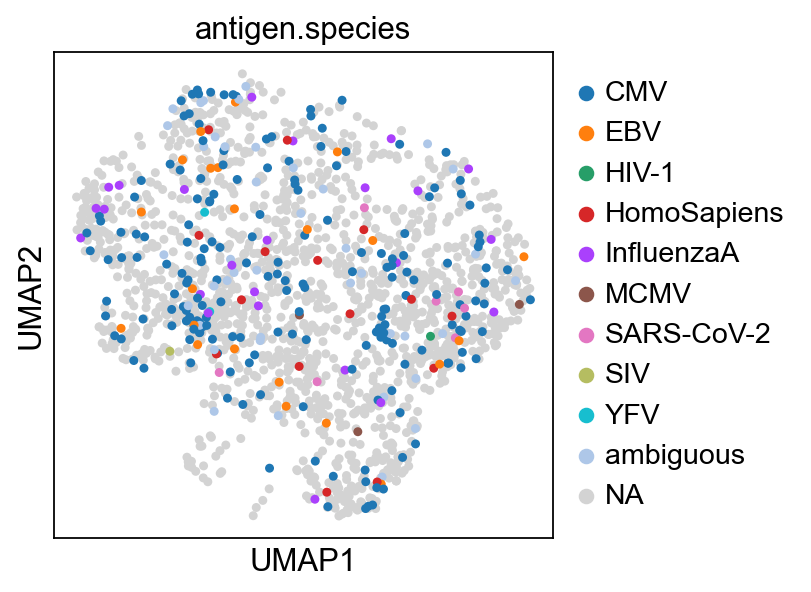

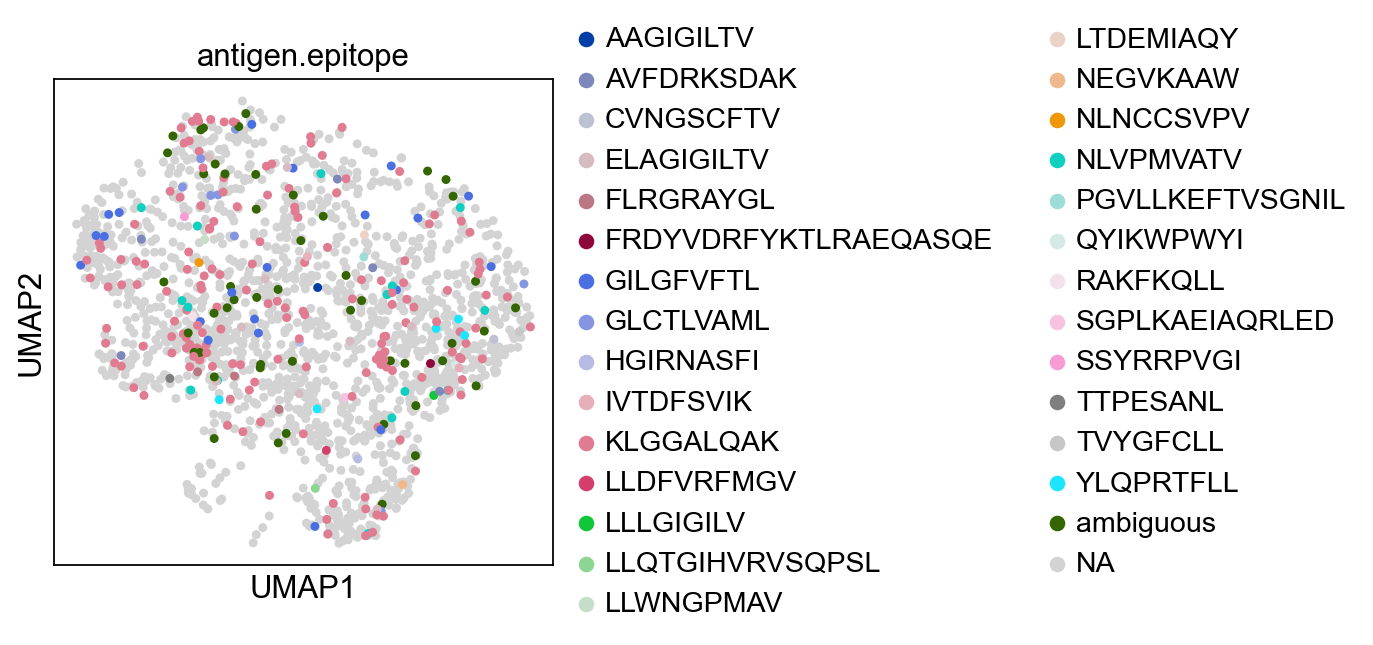

In [126]:
sc.pl.umap(adata, color="antigen.species")
sc.pl.umap(adata, color="antigen.epitope")

In [127]:
adata

AnnData object with n_obs × n_vars = 1845 × 11850
    obs: 'cluster_orig', 'patient', 'sample', 'source', 'clonotype_orig', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'has_ir', 'batch', 'extra_chains', 'n_genes', 'n_counts', 'cluster', 'receptor_type', 'receptor_subtype', 'chai

In [113]:
ep=[x.replace('nan','None') for x in [str(x) for x in adata.obs['antigen.epitope'].values]]

In [116]:
adata.obs['epitopes']=ep

/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'antigen.epitopeì' as categorical
/Users/danhudson/opt/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'epitopes' as categorical


<AxesSubplot:>

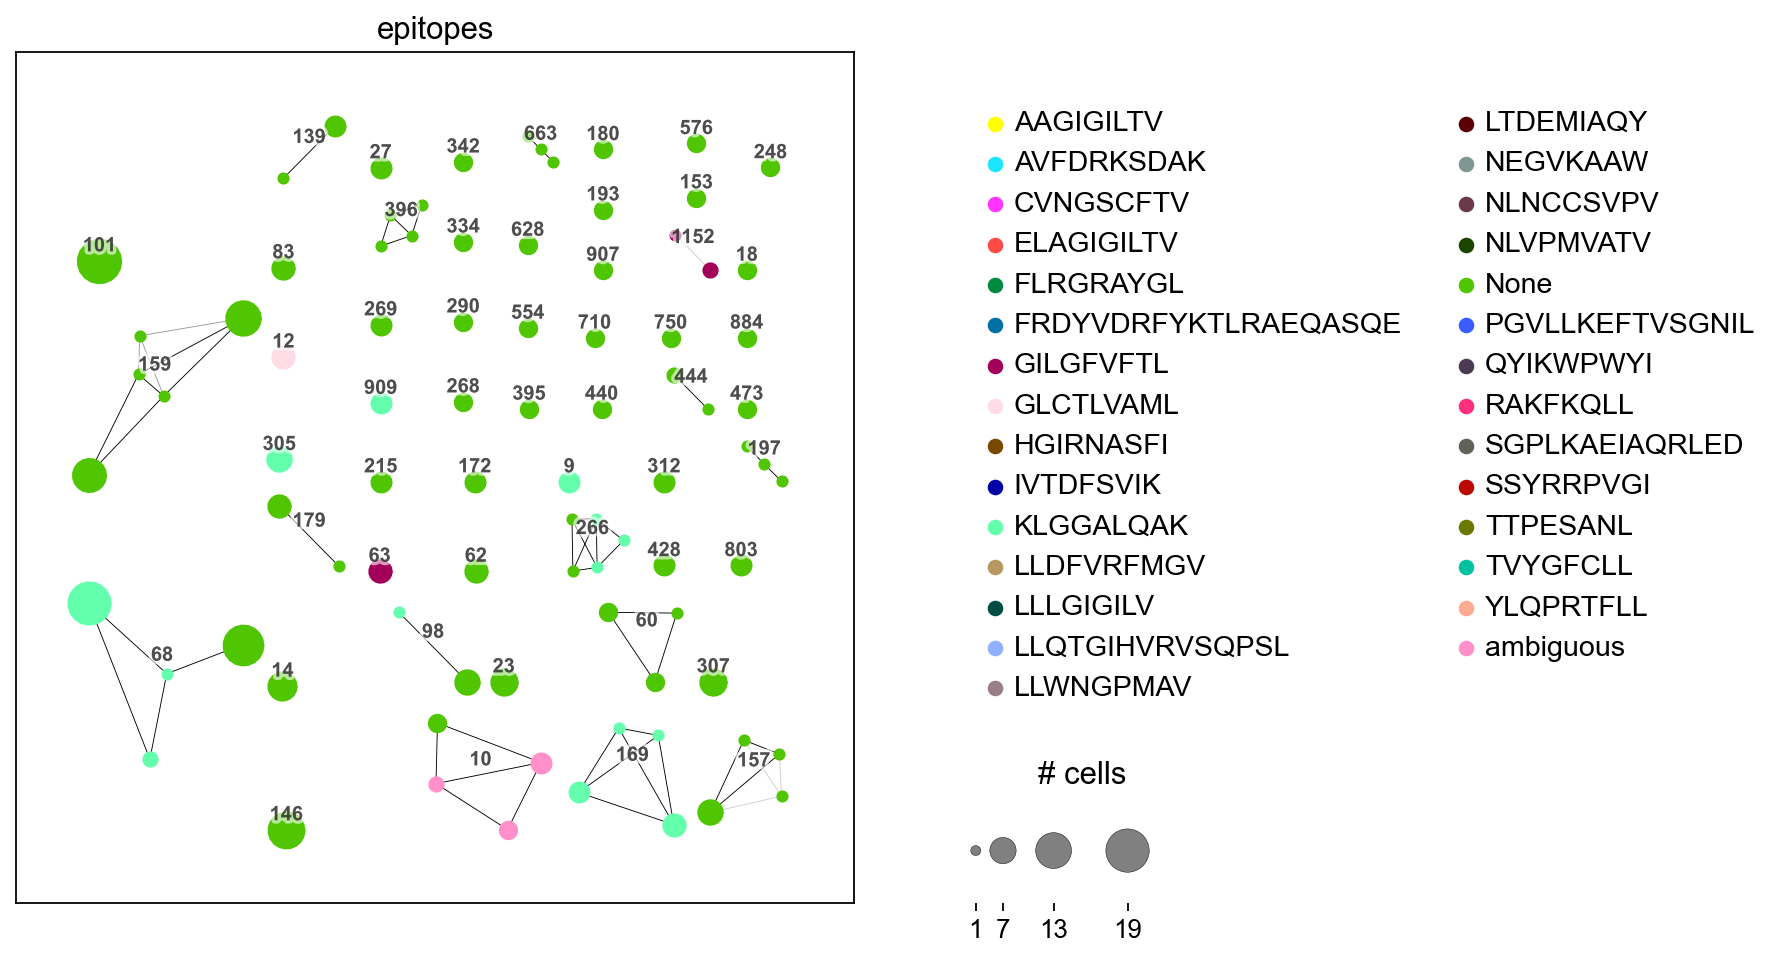

In [118]:
ir.pl.clonotype_network(
    adata, color="epitopes", label_fontsize=9, panel_size=(7, 7), base_size=20
)